In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [3]:
df = pd.read_csv('electronics_final.csv', header = 0)

In [4]:
print('dataset dimensions are:', df.shape)
df.describe(include = 'all')
df['Product_price'] = df['Product_price'].str.replace('$', '')
df['Product_price'] = df['Product_price'].str.replace(',', '')

dataset dimensions are: (2006, 10)


In [5]:
df = df[df['Rating_Count'].map(len)>8]

In [6]:
df

,Product_code,Product_name,Product_description,Product_URL,Breadcrumb_parent,Breadcrumb_active,Product_price,Rating_Value,Rating_Count,Recommended_Prods
0,35X5YDKAGYGK,"RCA 50"" Class 4K Ultra HD (2160P) LED TV (RLDE...","The RCA 50"" 2160p Class 4K Ultra High-Definiti...",https://walmart.com/ip/35X5YDKAGYGK,Electronics,/All TVs,219.99,3.9,1254 ratings,"['5YZBEUJO11MO', '1CFXZI1QNUKO', '6SA8LLNNSLMP..."
1,2RKSQC7C8QKZ,"RCA 55"" Class 4K Ultra HD (2160P) HDR Roku Sma...",Enjoying 4K Ultra HD just got easier. RCA Roku...,https://walmart.com/ip/2RKSQC7C8QKZ,Electronics,/All TVs,279.99,4.2,595 ratings,"['1CFXZI1QNUKO', '2X3MQ9SM84AA', '6SA8LLNNSLMP..."
2,4U07UQJGM4NA,"LG 65"" Class 4K UHD 2160P Smart TV 65UN7300PUF...",Empower entertainment with LG UHD TV. LG's UHD...,https://walmart.com/ip/4U07UQJGM4NA,Electronics,/All TVs,646.99,4.3,154 ratings,"['2MJRWZI33VET', '46VQULKOD37S', '2Z0G09Y8QKOL..."
3,75BV5KCCV6DE,"SAMSUNG 70"" Class 4K Crystal UHD (2160P) LED S...",This smart TV unlocks hidden detail at four ti...,https://walmart.com/ip/75BV5KCCV6DE,Electronics,/All TVs,947.00,4.4,2843 ratings,"['46VQULKOD37S', '5NGD72QFL38K', '3YFRMHEUUEZD..."
4,7K3V50QQP6XT,"TCL 32"" Class 1080P FHD LED Roku Smart TV 3 Se...",The 3-Series TCL Roku TV puts all your enterta...,https://walmart.com/ip/7K3V50QQP6XT,Electronics,/All TVs,149.99,4.4,208 ratings,"['2Z3IRIL1ATIA', '60R8ZDOQCUAS', '5HF3T8I5XH2A..."
...,...,...,...,...,...,...,...,...,...,...
2001,2GR4W5AW89OG,"Vankyo MatrixPad Z1 Kids 7 inch, 32GB ROM, Kid...",Vankyo MatrixPad Z1 Kids Made for fun Designed...,https://walmart.com/ip/2GR4W5AW89OG,Electronics,/Android Tablets for Kids,69.99,4.6,16 ratings,"['23G4WOJHC0S8', '5RWM6EUJ1XMV', '6B670NL5Q1D1..."
2002,6LMSIJ3OTOY1,Cell Phone Holder Phone Stand for Desk Tablet ...,NaN,https://walmart.com/ip/6LMSIJ3OTOY1,Cell Phones,/All Phone Car Holders,10.19,4.4,10 ratings,['Not available']
2003,3228PS39L547,Targus VersaVu Rotating Case for 9.7-inch iPad...,Whether you?re bringing your iPad to the offic...,https://walmart.com/ip/3228PS39L547,Electronics,"/iPad Cases, Sleeves & Bags",14.66,4.8,12 ratings,"['1094OQH0XWCG', '17HS4ZS6T8UI', '1R69MYZQ4TD6..."
2004,62IWO2UXRKG7,Apple USB Home Travel Adapter/ Lightning Cable...,Apple USB Home Travel Charger Adapter/ Lightni...,https://walmart.com/ip/62IWO2UXRKG7,Cell Phones,/Apple Phone Chargers,12.97,4.1,76 ratings,"['4CFBRDTTCHG0', '2UYU75A4276H', '64MDH00JKSBS..."


In [7]:
df = df.reset_index(drop = True)

In [8]:
#Let's take a smaller set of the data to speed up computations for this example
df_sample = df.iloc[:2002] 

In [9]:
df_sample.shape

(2001, 10)

In [10]:
rec_prods_ids = []
for i in range(len(df_sample.Product_code)):
    xx = df_sample.Recommended_Prods[i]
    for j in range(int(len(xx)/16)):
        rec_prods_ids.append(xx[16*j+2:16*j+14])

In [11]:
pr_code = df_sample.Product_code

In [12]:
pr = []
for i in range(len(pr_code)):
    pr.append(pr_code[i])

In [13]:
a = set(rec_prods_ids) & set(pr)
len(a)

919

In [79]:
coef_mat = np.zeros((len(pr_code), len(pr_code)))
for i in range(len(pr_code)):
    rec_prods_ids_ind = []
    xx = df_sample.Recommended_Prods[i]
    for j in range(int(len(xx)/16)):
        rec_prods_ids_ind.append(xx[16*j+2:16*j+14])
    b = set(rec_prods_ids_ind) & set(a)
    if len(b)>0:
        both = set(pr).intersection(b)
        ind = [pr.index(x) for x in both]
        coef_mat[i,ind] = 1

In [80]:

nodes_labels = np.arange(2001)

In [81]:
nodes_labels.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [82]:
weighted_mat = np.zeros((len(pr_code), len(pr_code)))

In [83]:

for i in range(len(pr_code)):
    p_s = []
    npr = []
    p_r = []
    p_ratings = []
    BAR = np.zeros(len(pr_code))
    indx = [i for i, x in enumerate(coef_mat[:,i]) if x]
    print(indx)
    
    
    
    p_score = df.Rating_Value[indx]
    p_s = p_score.to_numpy()
    p_s = p_s.astype(float)
    p_ratings = df.Rating_Count[indx]
    p_r = p_ratings.to_numpy()
    new_p_r = [x[:-8] for x in p_r]
    npr = np.array(new_p_r)
    npr = np.nan_to_num(npr, copy = False).astype(np.int)
    npr = npr.astype(float)
    bar_temp = []
    
    
    bc_P = df.Breadcrumb_parent[indx]
    bc_P = bc_P.tolist()
    bc_P1 = df.Breadcrumb_parent[i]
    bc_P1 = [bc_P1]
    both1 = set(bc_P).intersection(bc_P1)
    ind = [bc_P.index(x) for x in both1]



    for k in range(len(p_s)):
        bar_temp.append((npr[k]*p_s[k])/(npr[k]+min(npr)) + min(npr)*np.mean(p_s)/(npr[k]+min(npr)))
    BAR[indx] = bar_temp
    coef_mat[i,:] = BAR
    
    



[17, 62, 124, 164, 226]
[13, 17, 33, 92, 124, 192]
[14, 93, 163, 195, 236]
[46, 93, 118, 163, 200]
[7, 98, 181, 186]
[33, 192]
[28, 32, 54, 102, 113, 119, 130, 166, 175, 185, 186, 260]
[4, 77, 98, 129, 168, 179]
[65, 131, 203]
[122]
[30, 39, 56, 96, 103, 111, 135, 159, 162, 189, 191, 194, 240]
[]
[]
[1, 92]
[2, 35, 97, 107, 116, 166, 184, 188, 192, 233]
[46, 122, 193]
[18, 20, 24, 25, 42, 44, 57, 58, 65, 66, 73, 75, 81, 82, 90, 109, 115, 122, 123, 125, 128, 131, 136, 139, 140, 171, 180, 195, 196, 198, 203, 211, 213, 218, 220, 222, 224, 226, 227, 260]
[0, 1, 62, 124, 192]
[16, 26, 202, 209]
[]
[16]
[40, 68, 73, 75, 76, 82, 84, 104, 109, 115, 122, 140, 158, 215, 220, 226, 245, 265]
[28, 29, 45, 54, 96, 98, 127, 159, 172]
[41, 51]
[16, 43, 101, 117, 155, 171]
[16, 46, 198, 218]
[18]
[55, 91, 138, 216]
[6, 22, 29, 113, 172, 185]
[22, 28, 127, 159, 172]
[10, 103, 111, 149, 161, 191, 206, 232]
[49, 144, 246]
[6, 117, 185, 240]
[1, 5]
[]
[14, 156, 233, 236]
[53, 195, 233, 236]
[46, 93, 100, 1

/Users/bhaskar/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


[]
[]
[]
[96, 98, 102, 111, 119, 194]
[16, 44, 125, 131, 143, 163, 177, 200, 203, 227, 241, 1552]
[27, 55, 206]
[1, 13, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 113, 115, 116, 117, 118, 119, 120, 121, 124, 125, 127, 129, 130, 131, 132, 134, 135, 136, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 206, 207, 208, 209, 211, 215, 216, 217, 218, 220, 221, 222, 223, 226, 227, 229, 230, 232, 233, 234, 235, 236, 238, 239, 241, 245, 246, 260, 1444]
[2, 3, 37, 92, 110, 118, 125, 193, 196]
[44, 57, 92]
[92, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 113, 115, 116, 117, 118, 119, 120, 121, 124, 125, 127, 129, 130, 131, 132, 134, 135, 136, 139, 140, 141, 142, 143, 144, 145, 14

[377, 442, 502]
[]
[310, 311, 338, 373, 401, 413]
[]
[243, 286, 288, 293, 305, 319, 320, 328, 349, 352, 378, 411, 511]
[336]
[263, 342, 374]
[288, 293, 300, 305, 316, 320, 328, 349, 352, 355, 407, 424, 511, 601]
[288, 293, 305, 316, 319, 328, 349, 407, 511]
[248, 304]
[387, 414]
[]
[]
[248, 304]
[]
[1862, 1871]
[243, 288, 293, 305, 316, 319, 320, 349, 352, 355, 407, 424, 511]
[381, 387, 388, 394, 414, 423, 454, 470, 510, 519, 524, 594]
[347, 363, 367]
[]
[459]
[370, 393]
[]
[293]
[317]
[]
[310, 314]
[248, 304, 433]
[293, 480]
[]
[318, 374, 413]
[]
[]
[]
[]
[330, 363, 367, 421, 477, 593, 625, 753]
[]
[288, 300, 305, 316, 319, 320, 328]
[310, 311]
[519, 594]
[288, 305, 316, 319, 328]
[248, 304]
[]
[285, 319, 328]
[]
[293, 395, 601]
[256, 270, 296, 303]
[]
[]
[441, 448]
[]
[330, 347, 367]
[419, 534]
[]
[293, 395, 514, 592, 601]
[330, 347, 363, 593]
[]
[381, 387, 391, 414, 435, 454, 510, 594, 1814]
[333, 393, 521]
[261, 286]
[389]
[253, 263, 310, 311, 314, 413]
[318, 342]
[293, 310, 311, 4

[980, 1060]
[919, 949, 960]
[]
[773, 922, 925, 945, 976, 1047]
[773, 802, 1035, 1075]
[773, 776, 791, 799, 803, 913, 914, 934, 935, 970, 971, 976, 1015, 1027, 1050, 1065]
[764, 787, 805, 880, 891, 920, 923, 941, 946, 950, 959, 963, 967, 980, 1014, 1020, 1022, 1025, 1048, 1058, 1060, 1061, 1075]
[766, 1028, 1061, 1072]
[811, 892, 905, 906, 908, 909, 919, 937, 939, 944, 960, 968, 969, 1016, 1038]
[752, 774, 784, 788, 790, 801, 805, 807, 808, 811, 826, 881, 888, 889, 920, 926, 929, 938, 953, 959, 963, 965, 968, 972, 973, 976, 977, 978, 983, 1009, 1022, 1028, 1035, 1048, 1050, 1058, 1064, 1076]
[771, 773, 787, 879, 922]
[]
[773, 787]
[773, 783, 976, 1015, 1065]
[773, 808, 826, 880, 894, 899, 901, 1063, 1072, 1083]
[773]
[]
[771, 773, 799, 801, 805, 806, 807, 812, 814, 816, 826, 879, 881, 886, 888, 889, 891, 894, 899, 901, 910, 918, 923, 924, 925, 931, 936, 965, 972, 977, 978, 983, 988, 1010, 1014, 1018, 1019, 1027, 1028, 1029, 1034, 1035, 1039, 1045, 1047, 1049, 1050, 1055, 1072, 1076]
[77

[]
[]
[1149]
[]
[]
[1343]
[1163]
[1081]
[1103, 1115, 1268]
[752, 761, 774, 787, 799, 806, 1072]
[773, 795, 797, 805, 810, 811, 812, 823, 924]
[]
[537, 539]
[]
[773, 784, 795, 805, 812, 814, 880, 918, 920, 923, 964, 1049]
[764, 770, 773, 783, 791, 797, 810, 811, 812, 814, 823, 918, 1026, 1046, 1065, 1067]
[786, 798, 804, 916, 919]
[762, 767, 773, 803, 811, 812, 814, 823, 887, 917, 918, 939, 1031]
[761, 776, 795, 799, 800, 803, 805, 812, 814, 826, 917, 955, 1027, 1072]
[768, 773, 795, 803, 804, 805, 811, 812, 823, 918, 925, 1083]
[764, 773, 775, 776, 784, 797, 805, 811, 812, 814, 826, 918, 920, 923, 941, 1029, 1034, 1039, 1042, 1049, 1056, 1069]
[]
[764, 773, 784, 787, 804, 808, 946]
[773, 803, 811, 812, 814, 938]
[]
[776, 784, 800, 804, 806, 891, 920, 934, 946, 1029]
[770, 773, 797, 800, 805, 811, 812, 823, 918, 932, 1015, 1037, 1059, 1067]
[761, 776, 783, 795, 799, 800, 803, 805, 812, 826, 955, 1018, 1072]
[773, 785, 787, 795, 804, 805, 812, 814, 823, 826, 918, 920, 923, 932, 955, 964,

[]
[]
[]
[1328, 1330, 1339]
[]
[1078, 1098, 1333, 1338]
[]
[464, 1081, 1324, 1330, 1339]
[]
[1081, 1324, 1328, 1339]
[1200, 1213, 1214, 1230, 1241]
[]
[1086, 1113, 1326, 1337, 1370]
[]
[1343]
[]
[1101, 1238, 1319, 1333]
[999, 1078, 1276, 1326, 1346]
[1081, 1324, 1328, 1330]
[]
[1213, 1227]
[]
[981, 1005, 1144, 1335]
[]
[1088, 1114, 1128, 1158, 1269]
[999, 1068, 1070, 1101, 1338]
[1097, 1213]
[1200, 1213, 1227]
[1200, 1212, 1213, 1227]
[1227]
[1200, 1213, 1227]
[]
[]
[]
[1100, 1158]
[]
[1200, 1207, 1213, 1226, 1227, 1840]
[1200, 1213, 1227]
[]
[1205, 1212, 1220, 1266]
[]
[1200, 1213, 1365]
[]
[1200, 1213, 1227]
[1362]
[]
[1097, 1100, 1102]
[1200, 1213, 1227]
[1200, 1207, 1209, 1210, 1213, 1214, 1216, 1219, 1225, 1226, 1371]
[379, 1166, 1333]
[1200, 1207, 1209, 1213, 1216, 1225, 1369]
[]
[1200, 1213]
[1375, 1379, 1380, 1383, 1385, 1386, 1388, 1389, 1390, 1392, 1397, 1398, 1401, 1403, 1404, 1405, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1416, 1419, 1421, 1424, 1425, 1426, 1427, 142

[]
[]
[]
[1374, 1416, 1418, 1430, 1435, 1533]
[1147, 1374, 1412, 1430]
[]
[1613, 1617, 1629]
[1374, 1416, 1418, 1424, 1430, 1435, 1440, 1526, 1533]
[1374, 1416, 1418, 1430, 1435, 1522, 1533]
[1374, 1416, 1418, 1430, 1435, 1440, 1445, 1448, 1533, 1615, 1616]
[1374, 1413, 1416, 1418, 1430, 1432, 1435, 1440, 1448, 1514, 1533, 1542, 1544]
[1374, 1416, 1418, 1430, 1435, 1533, 1616]
[1374, 1416, 1418, 1430, 1435, 1533]
[1374, 1416, 1418, 1422, 1430, 1431, 1435, 1436, 1533]
[299, 300, 625, 1374, 1430, 1435, 1518, 1533, 1605]
[1374, 1416, 1418, 1430, 1435, 1533]
[1374, 1416, 1418, 1430, 1435, 1533, 1608]
[1374, 1416, 1418, 1430, 1435, 1440, 1487, 1533, 1608, 1610]
[1374, 1411, 1416, 1418, 1430, 1435, 1440, 1448, 1522, 1605, 1629, 1636]
[1374, 1418, 1430, 1435, 1440, 1448, 1533, 1537]
[1374, 1416, 1418, 1430, 1435, 1533]
[1374, 1416, 1418, 1430, 1435, 1533]
[1374, 1416, 1418, 1430, 1435, 1533]
[1374, 1416, 1418, 1430, 1435, 1533]
[1635]
[402, 606, 1374, 1430]
[]
[1635]
[1374, 1412, 1430, 1526]


In [84]:
df['Product_price'] = df['Product_price'].astype(float)

In [85]:
for i in range(len(pr_code)):
# for i in range(1):
    for j in range(len(pr_code)):
        if (i != j) & (coef_mat[i,j]==1):
            
            if (df.Breadcrumb_parent[i] == df.Breadcrumb_parent[j]):
                coef_mat[i,j] += 2.5
            if (df.Breadcrumb_active[i] == df.Breadcrumb_active[j]):
                coef_mat[i,j] += 2.5
            if (abs(df.Product_price[i]-df.Product_price[j]) < 0.3*df.Product_price[i]):
                coef_mat[i,j] += 5-2.5*(abs(df.Product_price[i]-df.Product_price[j]))/0.7*df.Product_price[i]

In [86]:
dup = []

for k in coef_mat:
    for i in k:
        dup.append(i)

print(max(dup))

11.0


In [87]:
coef_mat = abs(coef_mat)/15

In [88]:
sum(coef_mat)

array([1.29553936, 1.67090856, 1.4453191 , ..., 0.3175    , 0.27333333,
       0.        ])

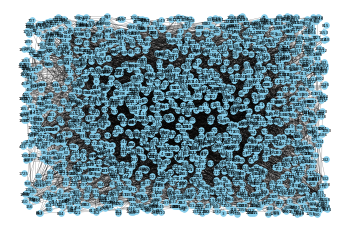

In [73]:
#Create Graph object using the weighted product matrix as adjacency matrix
G = nx.from_numpy_matrix(coef_mat)
pos=nx.random_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = nodes_labels[idx]

nx.draw_networkx_nodes(G, pos , node_color="skyblue", node_size=30)
nx.draw_networkx_edges(G, pos,  edge_color='k', width= 0.3, alpha= 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=4)
plt.axis('off')
plt.show() # display

In [74]:
#Export graph to Gephi
H=nx.relabel_nodes(G,labels) #create a new graph with Description labels and save to Gephi for visualizations
nx.write_gexf(H, "gr_elec.gexf")

In [89]:
basket = ['35X5YDKAGYGK']

In [90]:
pr_code = pr_code.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [91]:
both = set(pr_code).intersection(basket)
ind_indf = [pr_code.index(x) for x in both]

In [92]:
ind_indf

[0]

In [133]:
no_of_suggestions = 3

all_of_basket = coef_mat[0,:]

In [135]:
all_of_basket = [x for x in all_of_basket if str(x) != 'nan']
all_of_basket = np.asarray(all_of_basket)

In [136]:
all_of_basket = np.sort(all_of_basket)

In [126]:
sum(all_of_basket)

0.9466666666666668

In [148]:
suggestions_to_customer = all_of_basket[-no_of_suggestions:]

In [137]:
print(all_of_basket)

[0.         0.         0.         ... 0.24       0.24666667 0.26      ]


In [139]:
suggestions_to_customer
coef_temp = coef_mat[0,:]
coef_temp = coef_temp.tolist()

In [140]:
both = set(coef_temp).intersection(suggestions_to_customer)
ind_ind2 = [coef_temp.index(x) for x in both]


In [150]:
for i in range(3):
    print('https://www.walmart.com/ip/'+pr_code[ind_ind2[i]])

https://www.walmart.com/ip/6SA8LLNNSLMP
https://www.walmart.com/ip/73OL9PWT7Y6C
https://www.walmart.com/ip/0TAB3TZCK2TS


In [146]:
pr_code[0]

'35X5YDKAGYGK'

In [149]:
ind_ind2

[17, 124, 164]